<h1>Bussiness Problem :</h1>
    
<h2> Insurance companies need to set the insurance premiums following the population trends. </h2>

<h1> The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.</h1>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
for x in range(0,len(columns)):
    ins=columns[x]
    value=df[ins].value_counts()
    print(value)
    print("----------------------------------")

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
----------------------------------
sex
male      675
female    662
Name: count, dtype: int64
----------------------------------
bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64
----------------------------------
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
----------------------------------
smoker
no     1063
yes     274
Name: count, dtype: int64
----------------------------

<h1>Columns</h1>
+ age: age of primary beneficiary

+ sex: insurance contractor gender, female, male

+ bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

+ children: Number of dependents

+ smoker: Smoking

+ region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

+ charges: Individual medical costs billed by health insurance


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

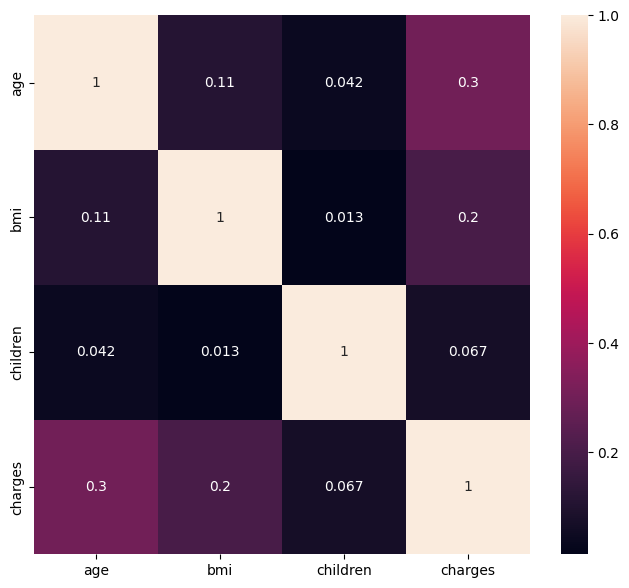

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(numeric_only=True), annot=True);

"age" : "yas",
    "sex" : "cinsiyet",
    "bmi" : "bmi",
    "children" : "cocuk_sayisi",
    "smoker" : "sigara_durumu",
    "region" : "bölge",
    "charges" : "masraflar"

<h4> age and charges column have correlated with 0.3 (30%) </h4>

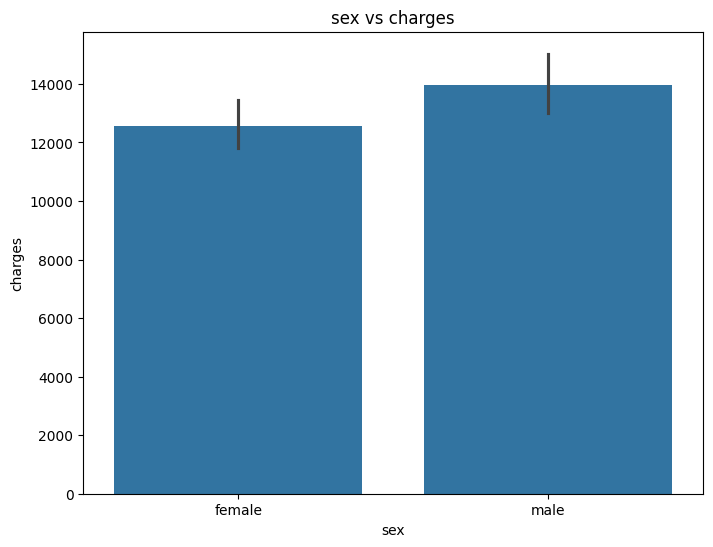

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='charges')
plt.xlabel('sex')
plt.ylabel('charges')
plt.title('sex vs charges')
plt.show()

<h4> from the above we can see that males medical cost more than the female medical cost </h4>

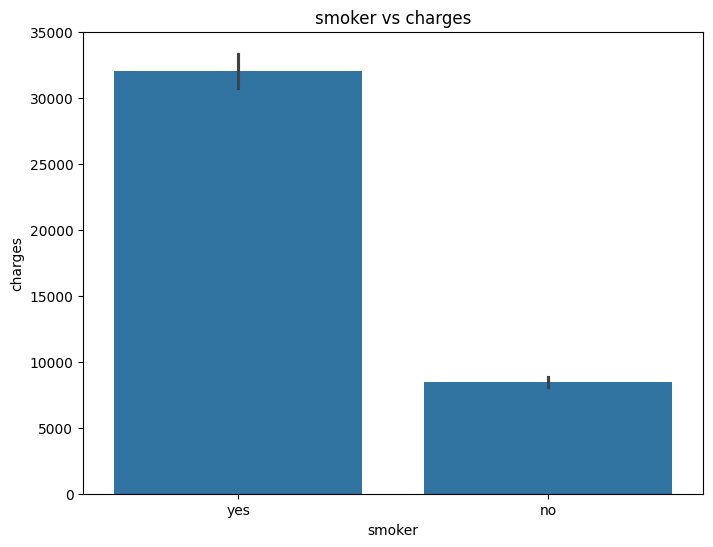

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoker', y='charges')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('smoker vs charges')
plt.show()

<Axes: xlabel='age', ylabel='charges'>

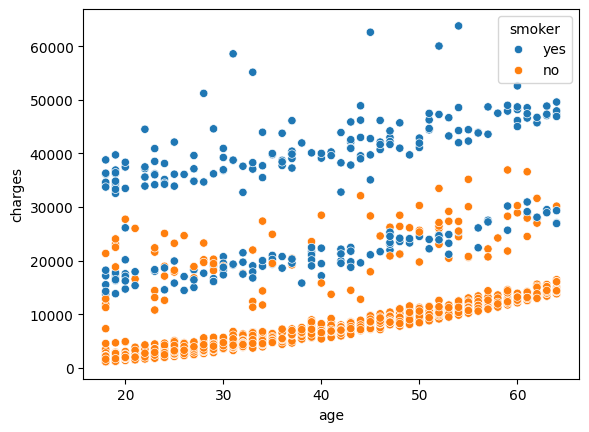

In [ ]:
sns.scatterplot(x="age",
                    y="charges",
                    hue="smoker",
                    data=df)

<Axes: title={'center': 'bmi'}, xlabel='region'>

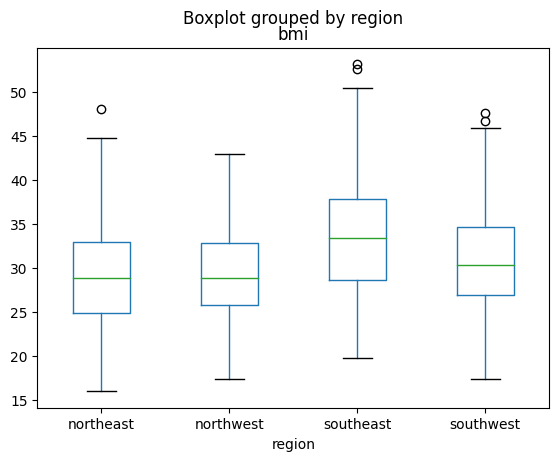

In [ ]:
df.boxplot(by ='region', column =['bmi'], grid = False)

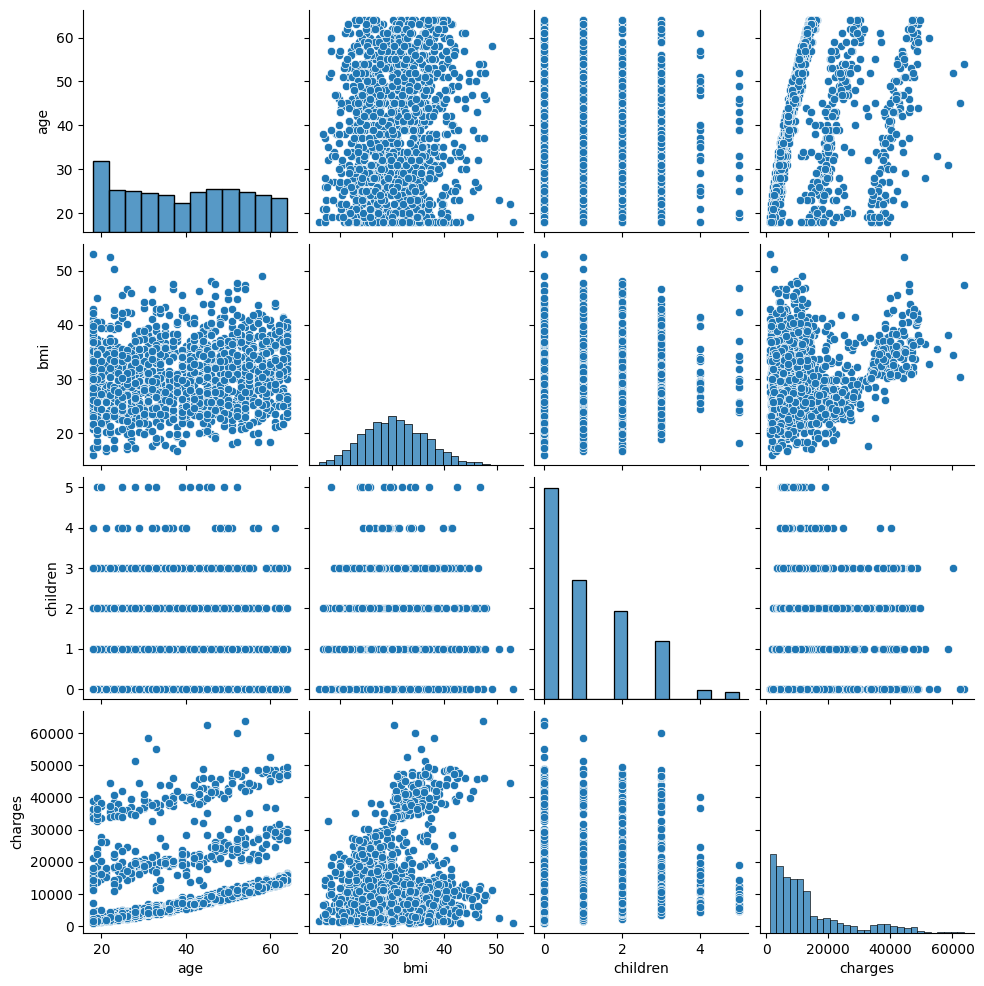

In [ ]:
sns.pairplot(df)

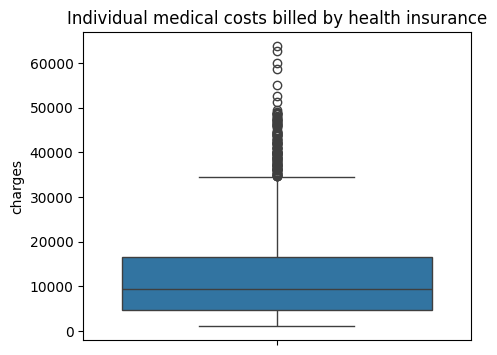

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(df['charges'])
plt.title("Individual medical costs billed by health insurance")
plt.ylabel("charges")
plt.show()

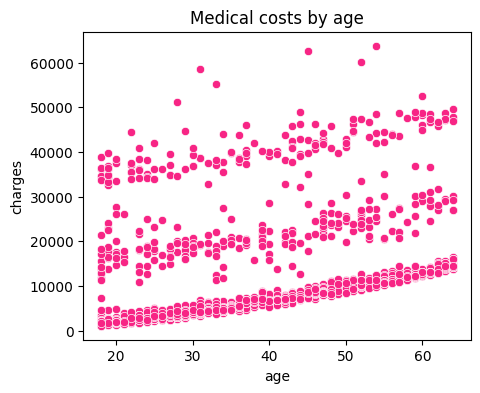

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x='age', y='charges',color = '#F72585')
plt.title("Medical costs by age")
plt.show()

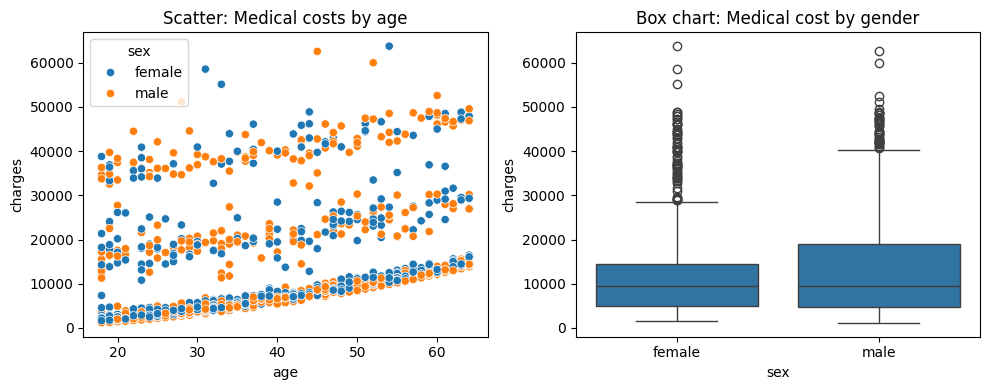

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10,4))

sns.scatterplot(data=df, x='age', y='charges', hue="sex", ax=axes[0])
axes[0].set_title("Scatter: Medical costs by age")

sns.boxplot(data=df, x='sex', y='charges', ax=axes[1])
axes[1].set_title("Box chart: Medical cost by gender")

plt.tight_layout()
plt.show()

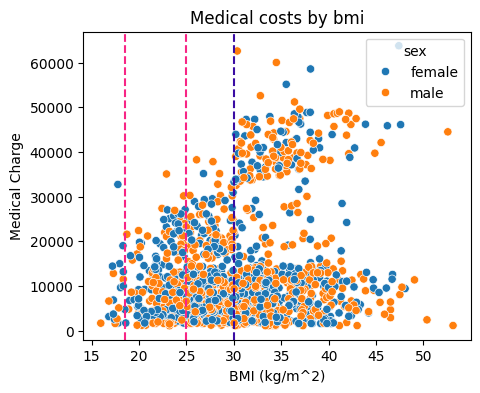

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex')
plt.axvline(x=18.5, color='#F72585', linestyle = '--')
plt.axvline(x=25, color = '#F72585', linestyle = '--')
plt.axvline(x=30, color = '#3A0CA3', linestyle = '--')
plt.title("Medical costs by bmi")
plt.xlabel("BMI (kg/m^2)")
plt.ylabel("Medical Charge")
plt.show()

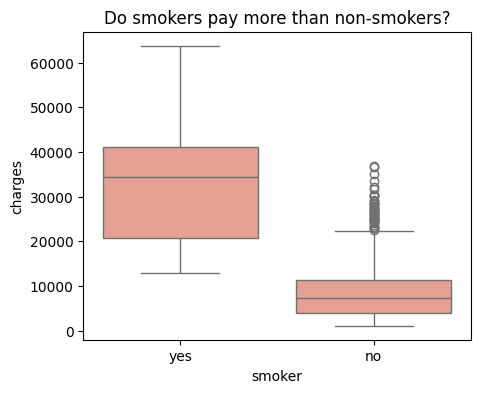

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='smoker',y='charges',color = '#F19785')
plt.title("Do smokers pay more than non-smokers?")
plt.show()

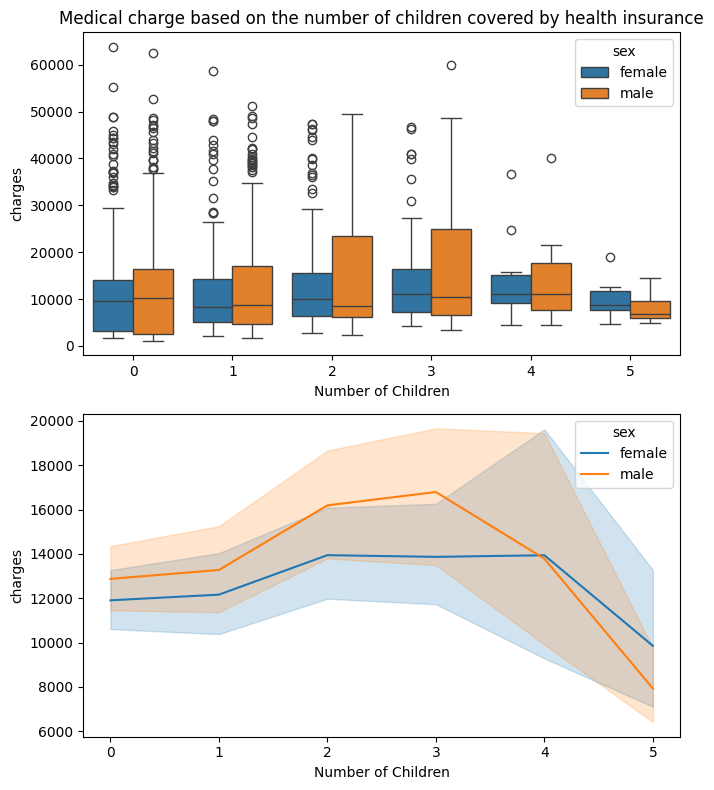

In [ ]:
fig, axes = plt.subplots(2, 1, figsize = (7,8))

sns.boxplot(data=df, x='children', y='charges', hue='sex', ax = axes[0])
axes[0].set_title("Medical charge based on the number of children covered by health insurance")
axes[0].set_xlabel("Number of Children")

sns.lineplot(data=df, x='children', y='charges', hue='sex', ax = axes[1])
axes[1].set_xlabel("Number of Children")

plt.tight_layout()
plt.show()

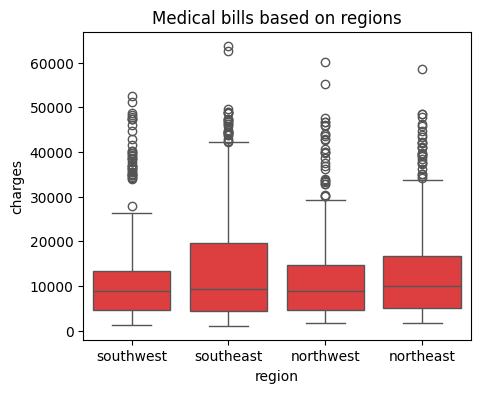

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='region', y='charges',color = '#F72528')
plt.title("Medical bills based on regions")
plt.show()

<h2> Step - 2: Document the below mentioned points properly:

    - Identify the input and output/target variables.

    - Identify the type of ML Task.

    - Identify the Evaluation Metric.

    - For regression task - Mean Absolute Error

    - For classification task - Accuracy
</h2>

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
y=df['charges'] # output
x=df.iloc[:,0:6] #input

In [ ]:
from sklearn.model_selection import train_test_split as split

In [ ]:
X_train,X_test,Y_train,Y_test=split(x, y, train_size=0.75, random_state=42)

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
763,27,male,26.03,0,no,northeast
1079,63,male,33.66,3,no,southeast
178,46,female,28.90,2,no,southwest
287,63,female,26.22,0,no,northwest
1290,38,female,19.95,2,no,northeast


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


In [ ]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,bmi,children
763,27,26.03,0
1079,63,33.66,3
178,46,28.90,2
287,63,26.22,0
1290,38,19.95,2


In [ ]:
from sklearn.preprocessing import RobustScaler

RS= RobustScaler()

X_train_num_rescaled = pd.DataFrame(RS.fit_transform(X_train_num),
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
763,-0.500000,-0.504831,-0.5
1079,1.000000,0.416667,1.0
178,0.291667,-0.158213,0.5
287,1.000000,-0.481884,-0.5
1290,-0.041667,-1.239130,0.5


In [ ]:
X_train_num.describe()

,age,bmi,children
count,1002.000000,1002.000000,1002.000000
mean,39.049900,30.613029,1.090818
std,13.970624,6.014827,1.196371
min,18.000000,15.960000,0.000000
25%,27.000000,26.315000,0.000000
50%,39.000000,30.210000,1.000000
75%,51.000000,34.595000,2.000000
max,64.000000,53.130000,5.000000


<H1>Applying OneHotEncoding on Categorical Columns</H1>

In [ ]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
763,male,no,northeast
1079,male,no,southeast
178,female,no,southwest
287,female,no,northwest
1290,female,no,northeast


In [ ]:
X_train_cat.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat),
                               columns=ohe.get_feature_names_out(X_train_cat.columns),
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
763,1.0,0.0,0.0,0.0,0.0
1079,1.0,0.0,0.0,1.0,0.0
178,0.0,0.0,0.0,0.0,1.0
287,0.0,0.0,1.0,0.0,0.0
1290,0.0,0.0,0.0,0.0,0.0


In [ ]:
#concatination

x_train_transformed=pd.concat([X_train_cat_ohe,X_train_num_rescaled],axis=1)
x_train_transformed

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
763,1.0,0.0,0.0,0.0,0.0,-0.500000,-0.504831,-0.5
1079,1.0,0.0,0.0,1.0,0.0,1.000000,0.416667,1.0
178,0.0,0.0,0.0,0.0,1.0,0.291667,-0.158213,0.5
287,0.0,0.0,1.0,0.0,0.0,1.000000,-0.481884,-0.5
1290,0.0,0.0,0.0,0.0,0.0,-0.041667,-1.239130,0.5
...,...,...,...,...,...,...,...,...
1096,0.0,1.0,0.0,0.0,0.0,0.500000,0.573671,0.5
1131,1.0,0.0,0.0,0.0,1.0,-0.500000,1.894928,0.5
1295,1.0,0.0,0.0,0.0,1.0,-0.791667,-0.991546,0.0
861,0.0,0.0,0.0,0.0,1.0,-0.041667,-0.266908,1.0


In [ ]:
X_test.head()

,age,sex,bmi,children,smoker,region
900,49,male,22.515,0,no,northeast
1064,29,female,25.600,4,no,southwest
1256,51,female,36.385,3,no,northwest
298,31,male,34.390,3,yes,northwest
237,31,male,38.390,2,no,southeast


In [ ]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
900,49,22.515,0
1064,29,25.600,4
1256,51,36.385,3
298,31,34.390,3
237,31,38.390,2


In [ ]:

X_test_num_rescaled = pd.DataFrame(RS.transform(X_test_num),
                                    columns = X_test_num.columns,
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
900,0.416667,-0.929348,-0.5
1064,-0.416667,-0.556763,1.5
1256,0.500000,0.745773,1.0
298,-0.333333,0.504831,1.0
237,-0.333333,0.987923,0.5


In [ ]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
900,male,no,northeast
1064,female,no,southwest
1256,female,no,northwest
298,male,yes,northwest
237,male,no,southeast


In [ ]:

X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat),
                               columns=ohe.get_feature_names_out(X_test_cat.columns),
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
900,1.0,0.0,0.0,0.0,0.0
1064,0.0,0.0,0.0,0.0,1.0
1256,0.0,0.0,1.0,0.0,0.0
298,1.0,1.0,1.0,0.0,0.0
237,1.0,0.0,0.0,1.0,0.0


In [ ]:
x_test_transformed=pd.concat([X_test_cat_ohe,X_test_num_rescaled],axis=1)
x_test_transformed

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
900,1.0,0.0,0.0,0.0,0.0,0.416667,-0.929348,-0.5
1064,0.0,0.0,0.0,0.0,1.0,-0.416667,-0.556763,1.5
1256,0.0,0.0,1.0,0.0,0.0,0.500000,0.745773,1.0
298,1.0,1.0,1.0,0.0,0.0,-0.333333,0.504831,1.0
237,1.0,0.0,0.0,1.0,0.0,-0.333333,0.987923,0.5
...,...,...,...,...,...,...,...,...
1014,0.0,0.0,0.0,0.0,1.0,-0.041667,-0.315217,-0.5
669,0.0,0.0,0.0,1.0,0.0,0.041667,-0.048309,0.0
1109,1.0,0.0,0.0,1.0,0.0,0.250000,-1.190821,1.0
788,1.0,0.0,0.0,0.0,0.0,-0.416667,-0.929348,1.0


**Observation**

1.The medical costs billed by health insurance are based on the policy of government, insurance companies. In the other words, the medical costs can be changed even though with the exact same values in our variables.

2.This dataset only contains ~1300 data, we always prefer more data if we want the model with more accuracy.

3.It will be even better if we can have more feature variables (columns).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
reg_model = [LinearRegression(),
             KNeighborsRegressor(),
             DecisionTreeRegressor(),
             RandomForestRegressor(n_estimators=200),
             SVR(),
             GradientBoostingRegressor()]

score_card05 = pd.DataFrame(columns = ["Algorithms","MAE"])
result05=[]
alg05=[]

for i in range(0,len(reg_model)):
    model_no = str(reg_model[i])
    object_f=reg_model[i]
    object_f.fit(x_train_transformed,Y_train)
    y_test_predicted=object_f.predict(x_test_transformed)
    mse = mean_absolute_error(Y_test,y_test_predicted)
    result05.append(mse)
    alg05.append(model_no)

score_card05["Algorithms"]=alg05
score_card05["MAE"]=result05

In [ ]:
score_card05

,Algorithms,MAE
0,LinearRegression(),4069.039466
1,KNeighborsRegressor(),3658.030869
2,DecisionTreeRegressor(),3212.650704
3,RandomForestRegressor(n_estimators=200),2666.818312
4,SVR(),8907.658390
5,GradientBoostingRegressor(),2572.006480


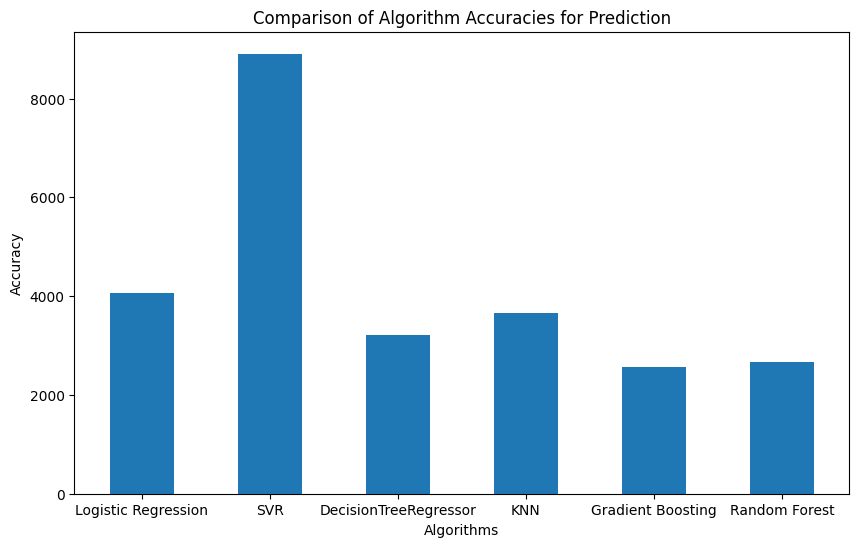

In [52]:
import matplotlib.pyplot as plt

algorithms = ["Logistic Regression", "SVR", "DecisionTreeRegressor", "KNN", "Gradient Boosting", "Random Forest"]
accuracies = [4069.039466, 8907.658390,3212.650704 , 3658.030869, 2572.006480, 2666.818312]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, width=0.5)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Algorithm Accuracies for Prediction")
plt.show()

**Conclusion**

1.We have found some insights and trends through our EDA processes, more details will be shown below.

2.We built a accuracy alogoritm and had 93%, that means the higest accuracy for prediction is SVR.